# Bank Transaction Dataset for Fraud Detection

## Introduction
This dataset contains **2,512 bank transactions** with **16 features** related to transaction details, customer information, and device/location data. The goal is to analyze the dataset to detect fraudulent transactions and build a predictive model for fraud detection.

### Dataset Overview:
- **Rows**: 2,512 transactions
- **Columns**: 16 features (described below)

## Dataset Columns Description

Below is a detailed description of each column in the dataset:

1. **TransactionID**: Unique alphanumeric identifier for each transaction.
2. **AccountID**: Unique identifier for each account, with multiple transactions per account.
3. **TransactionAmount**: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
4. **TransactionDate**: Timestamp of each transaction, capturing date and time.
5. **TransactionType**: Categorical field indicating 'Credit' or 'Debit' transactions.
6. **Location**: Geographic location of the transaction, represented by U.S. city names.
7. **DeviceID**: Alphanumeric identifier for devices used to perform the transaction.
8. **IP Address**: IPv4 address associated with the transaction, with occasional changes for some accounts.
9. **MerchantID**: Unique identifier for merchants, showing preferred and outlier merchants for each account.
10. **Channel**: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
11. **CustomerAge**: Age of the account holder, with logical groupings based on occupation.
12. **CustomerOccupation**: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
13. **TransactionDuration**: Duration of the transaction in seconds, varying by transaction type.
14. **LoginAttempts**: Number of login attempts before the transaction, with higher values indicating potential anomalies.
15. **AccountBalance**: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
16. **PreviousTransactionDate**: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.

## Load the dataset

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/bank_transactions.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## Basic Dataset Information

Let’s explore the dataset's structure and summary statistics to understand its composition.

In [7]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

### Observations from `df.info()`:
- The dataset has **2,512 rows** and **16 columns**.
- There are **no missing values** in any column (all columns have 2,512 non-null entries).
- Data types include:
  - **Float64**: `TransactionAmount`, `AccountBalance`
  - **Int64**: `CustomerAge`, `TransactionDuration`, `LoginAttempts`
  - **Object**: All other columns (e.g., `TransactionID`, `AccountID`, `TransactionDate`, etc.)

In [8]:
# Display summary statistics for numerical columns
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Observations from `df.describe()`:

1. **TransactionAmount**:
   - Average: **\$297.59**, with a wide range from **\$0.26** to **\$1,919.11**.
   - 75% of transactions are below **\$414.53**.

2. **CustomerAge**:
   - Average age: **44.67 years**, ranging from **18** to **80**.
   - Median age: **45 years**.

3. **TransactionDuration**:
   - Average duration: **119.64 seconds**, ranging from **10** to **300 seconds**.
   - 75% of transactions complete in under **161 seconds**.

4. **LoginAttempts**:
   - Average: **1.12 attempts**, with most transactions (75%) involving only **1 attempt**.
   - Maximum attempts: **5**.

5. **AccountBalance**:
   - Average balance: **\$5,114.30**, ranging from **\$101.25** to **\$14,977.99**.
   - Median balance: **\$4,735.51**.


## Data Cleaning

In [9]:
df.isnull().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(0)

## Data Convertion

In [11]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df[['TransactionDate', 'PreviousTransactionDate']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2512 non-null   datetime64[ns]
 1   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.4 KB


## Outliers Check

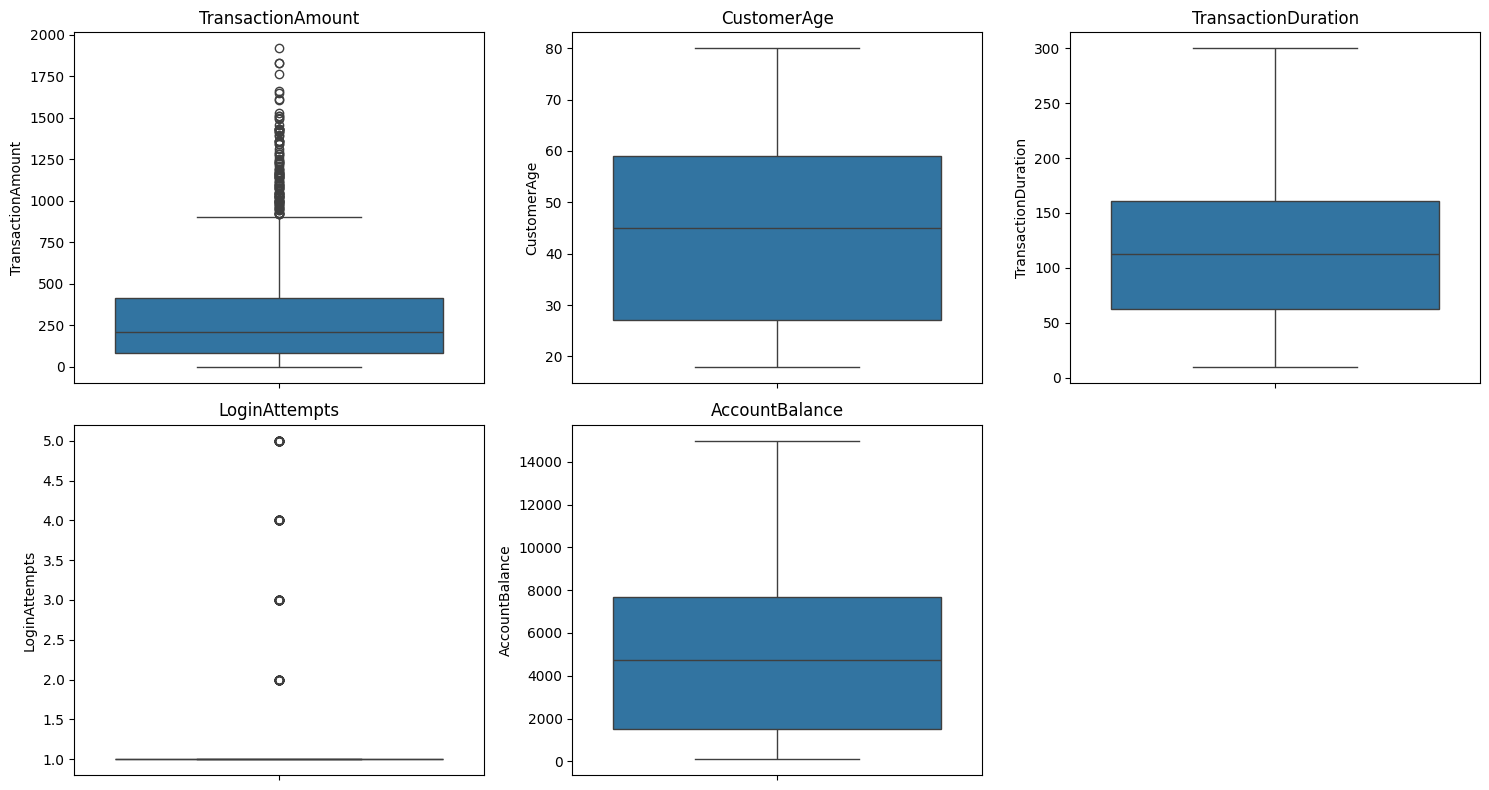

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Observations:
1. **TransactionAmount**:
   - Some transactions have very high amounts (up to \$1,919.11), which could be outliers or legitimate large transactions.
2. **CustomerAge**:
   - The age range (18 to 80) is reasonable, with no outliers.
3. **TransactionDuration**:
   - Some transactions take up to 300 seconds (5 minutes), which might be outliers or indicate unusual activity.
4. **LoginAttempts**:
   - Most transactions involve 1 login attempt, but some have up to 5 attempts, which could indicate anomalies.
5. **AccountBalance**:
   - Some accounts have very high balances (up to \$14,977.99), which could be outliers or legitimate for high-net-worth individuals.

### Action:
- We’ll keep the outliers for now, as they might be important for fraud detection (e.g., unusually high transaction amounts or login attempts).

## Unique Values Categorical Columns

In [13]:
# Check unique values in categorical columns
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print("\n")

Unique values in TransactionType: ['Debit' 'Credit']


Unique values in Location: ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']


Unique values in DeviceID: ['D000380' 'D000051' 'D000235' 'D000187' 'D000308' 'D000579' 'D000241'
 'D000500' 'D000690' 'D000199' 'D000205' 'D000589' 'D000032' 'D000054'
 'D000309' 'D000466' 'D000671' 'D000432' 'D000530' 'D000039' 'D000152'
 'D000268' 'D000142' 'D000162' 'D000036' 'D000046' 'D000310' 'D000232'
 'D000297' 'D000587' 'D000282' 'D000621' 'D000111' 'D000357' 'D000042'
 'D000250' 'D000448' 

### Observations:
1. **TransactionType**:
   - Only two values: `Debit` and `Credit`. No inconsistencies.
2. **Location**:
   - All values are valid U.S. city names. No inconsistencies.
3. **DeviceID**:
   - All values are alphanumeric and unique. No inconsistencies.
4. **IP Address**:
   - All values are valid IPv4 addresses. No inconsistencies.
5. **MerchantID**:
   - All values are alphanumeric and unique. No inconsistencies.
6. **Channel**:
   - Only three values: `Branch`, `ATM`, and `Online`. No inconsistencies.
7. **CustomerOccupation**:
   - Only four values: `Student`, `Doctor`, `Engineer`, and `Retired`. No inconsistencies.


## Summary of Data Cleaning

1. **No Missing Values or Duplicates**:
   - The dataset is clean, with no missing values or duplicate rows.

2. **Data Type Conversion**:
   - `TransactionDate` and `PreviousTransactionDate` have been converted to `datetime`.

3. **Outliers**:
   - Outliers were identified in `TransactionAmount`, `TransactionDuration`, and `LoginAttempts`, but they were retained as they might be relevant for fraud detection.

4. **Categorical Data**:
   - No inconsistencies were found in categorical columns.

The dataset is now ready for **Exploratory Data Analysis (EDA)**.

## Exploratory Data Analysis (EDA)

In this step, we’ll explore the dataset visually and statistically to uncover patterns, trends, and relationships. EDA helps us understand the data better and identify potential features for fraud detection.

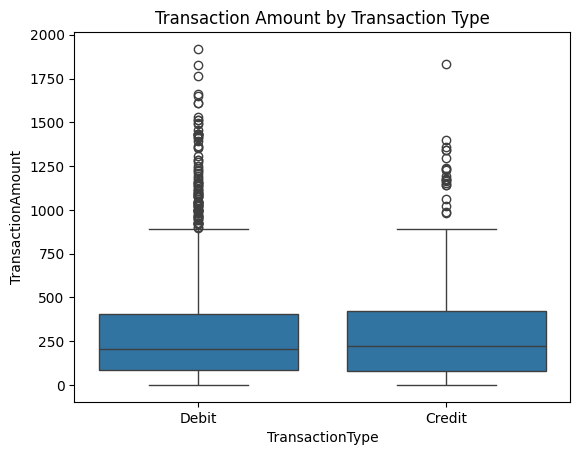

In [15]:
# Boxplot: TransactionAmount by TransactionType
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Transaction Type')
plt.show()

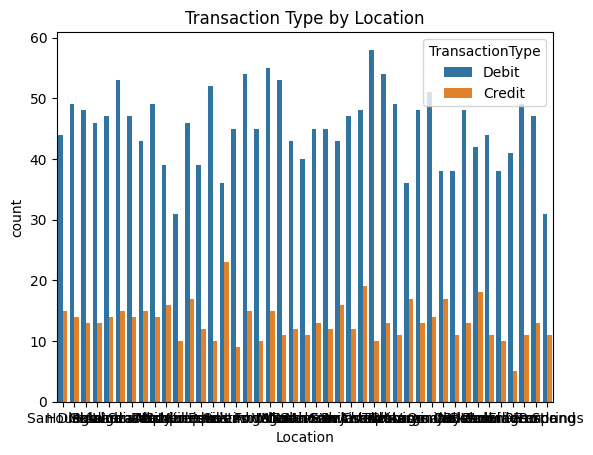

In [17]:
# Grouped bar plot: TransactionType by Location
sns.countplot(x='Location', hue='TransactionType', data=df)
plt.title('Transaction Type by Location')
plt.show()

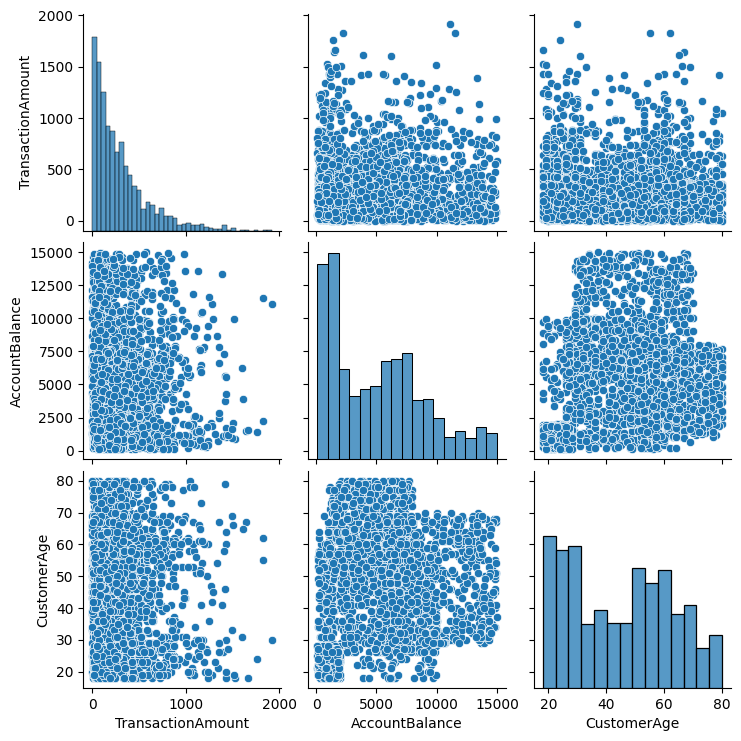

In [18]:
sns.pairplot(df[['TransactionAmount', 'AccountBalance', 'CustomerAge']])
plt.show()

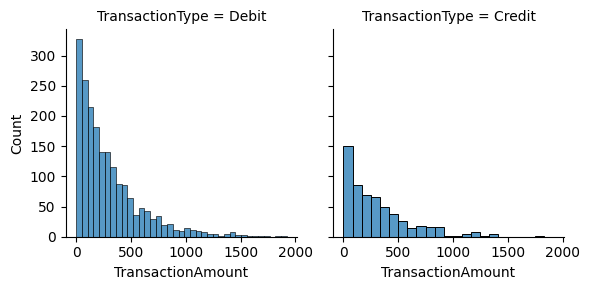

In [19]:
sns.FacetGrid(df, col='TransactionType').map(sns.histplot, 'TransactionAmount')
plt.show()

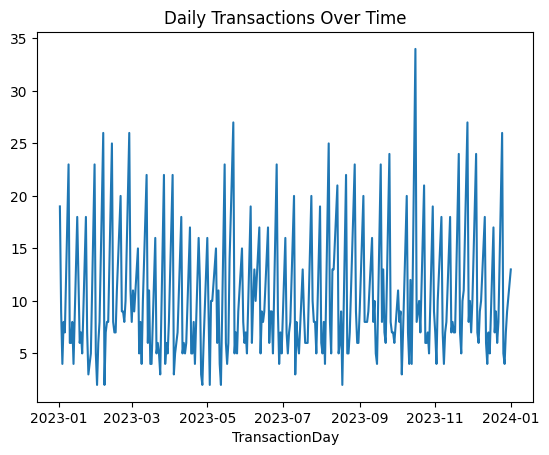

In [20]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date

daily_transactions = df.groupby('TransactionDay').size()
daily_transactions.plot(title='Daily Transactions Over Time')
plt.show()

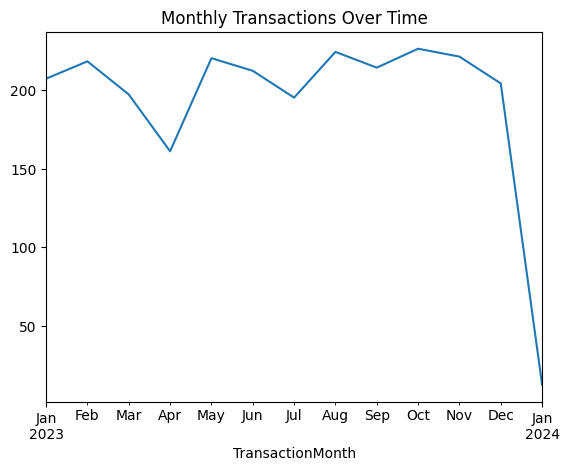

In [21]:
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
monthly_transactions = df.groupby('TransactionMonth').size()
monthly_transactions.plot(title='Monthly Transactions Over Time')
plt.show()